In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

In [4]:
df.head()

,variance,skew,curtsies,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
#There are five columns in this dataset, Variance, Skew, Curtsies, Entropy, and Classes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.shape

(1372, 5)

In [8]:
# This data set contains 1372 rows of data
# there were no null values found in the dataset

In [9]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

In [10]:
df["classes"].value_counts()

0    762
1    610
Name: classes, dtype: int64

In [11]:
# Class 0 has 762 entries and class 1 has 610 entries

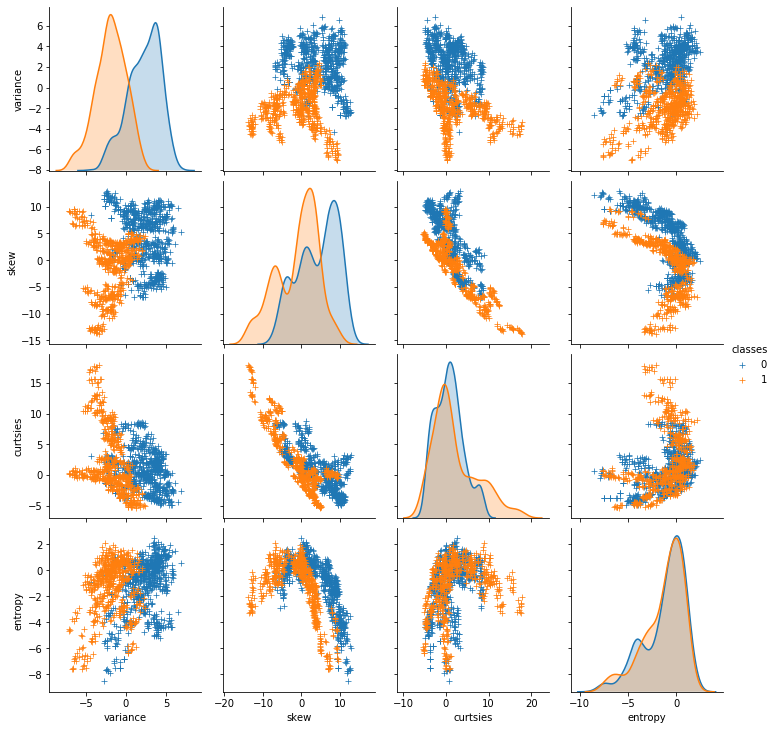

In [12]:
g = sns.pairplot(df, hue='classes', markers='+')
plt.show()

In [13]:
# this plot shows the values for classes 1 and 2 for each of the variables used

In [14]:
X = df.drop(['classes'], axis=1)
y = df['classes']

In [15]:
# The data is separated to X and Y values.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [17]:
#Using the train_test_split, the data was successfully split to predict values from the train set and compare it to the test set.

In [18]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [19]:
#The perceptron is used to go through different iterations and make predictions using the train data for X_test

In [20]:
y_pred = ppn.predict(X_test)

In [21]:
y_test

126     0
7       0
1082    1
188     0
719     0
       ..
1150    1
876     1
642     0
348     0
297     0
Name: classes, Length: 549, dtype: int64

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9817850637522769

In [23]:
# the model is shown to be 98% accurate

In [24]:
X1 = df.drop(['classes', 'curtsies'], axis=1)
y1 = df['classes']

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=1, stratify=y1)
ppn1 = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn1.fit(X_train1, y_train1)
y_pred1 = ppn1.predict(X_test1)
metrics.accuracy_score(y_test1, y_pred1)

0.8633879781420765

In [ ]:
#By removing the feature curtsies the accuracy score went down from 98% to 86% which means that curtsies was an important feature to be used to improve prediction.